<a href="https://colab.research.google.com/github/Zerzavot/GlobalAIHubDLCourse/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- laufkont = status

    - 1 : no checking account
    - 2 : … < 0 DM 
    - 3 : 0<= … < 200 DM 
    - 4 : … >= 200 DM / salary for at least 1 year

- laufzeit = duration

- moral = credit_history
    - 0 : delay in paying off in the past
    - 1 : critical account/other credits elsewhere
    - 2 : no credits taken/all credits paid back duly
    - 3 : existing credits paid back duly till now
    - 4 : all credits at this bank paid back duly

- verw = purpose

    - 0 : others
    - 1 : car (new)
    - 2 : car (used)
    - 3 : furniture/equipment
    - 4 : radio/television
    - 5 : domestic appliances
    - 6 : repairs
    - 7 : education
    - 8 : vacation
    - 9 : retraining
    - 10 : business

- hoehe = amount

- sparkont = savings

    - 1 : unknown/no savings account
    - 2 : … < 100 DM 
    - 3 : 100 <= … < 500 DM 
    - 4 : 500 <= … < 1000 DM 
    - 5 : … >= 1000 DM

- beszeit = employment_duration

    - 1 : unemployed
    - 2 : < 1 yr 
    - 3 : 1 <= … < 4 yrs 
    - 4 : 4 <= … < 7 yrs 
    - 5 : >= 7 yrs

- rate = installment_rate

    - 1 : >= 35
    - 2 : 25 <= … < 35
    - 3 : 20 <= … < 25
    - 4 : < 20

- famges = personal_status_sex

    - 1 : male : divorced/separated
    - 2 : female : non-single or male : single
    - 3 : male : married/widowed
    - 4 : female : single

- buerge = other_debtors

    - 1 : none
    - 2 : co-applicant
    - 3 : guarantor

- wohnzeit = present_residence

    - 1 : < 1 yr 
    - 2 : 1 <= … < 4 yrs 
    - 3 : 4 <= … < 7 yrs 
    - 4 : >= 7 yrs

- verm = property

    - 1 : unknown / no property
    - 2 : car or other
    - 3 : building soc. savings agr./life insurance
    - 4 : real estate

- alter = age

- weitkred = other_installment_plans

    - 1 : bank
    - 2 : stores
    - 3 : none

- wohn = housing

    - 1 : for free
    - 2 : rent
    - 3 : own

- bishkred = number_credits

    - 1 : 1
    - 2 : 2-3
    - 3 : 4-5
    - 4 : >= 6

- beruf = job

    - 1 : unemployed/unskilled - non-resident
    - 2 : unskilled - resident
    - 3 : skilled employee/official
    - 4 : manager/self-empl./highly qualif. employee

- pers = people_liable

    - 1 : 3 or more
    - 2 : 0 to 2

- telef = telephone

    - 1 : no
    - 2 : yes (under customer name)

- gastarb = foreign_worker

    - 1 : yes
    - 2 : no

- kredit = credit_risk

    - 0 : bad
    - 1 : good

In [ ]:
df = pd.read_csv("german_credit_data.csv")
df.head()

In [ ]:
categorical_columns = ["moral","verw","famges","buerge","verm","weitkred", "wohn",
                       "telef", "gastarb"]

df[categorical_columns] = df[categorical_columns].astype("str")
df_dummy = pd.get_dummies(df, drop_first = True)

df_dummy.head()

In [ ]:
X = df_dummy.drop("kredit", axis = 1) 
y = df_dummy["kredit"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,
                                                    random_state = 42)


In [ ]:
mu = X_train.mean()
sigma = X_train.std()

X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

In [ ]:
from sklearn.linear_model  import LogisticRegression

mdl = LogisticRegression(penalty = "none")
mdl.fit(X_train, y_train)

ypred_train = mdl.predict(X_train)
ypred_test =  mdl.predict(X_test)

ypred_test

In [ ]:
ypred_test_prob = mdl.predict_proba(X_test)
ypred_test_prob

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy Score: ", accuracy_score(y_test, ypred_test))
print("Precision Score: ", precision_score(y_test, ypred_test))
print("Recall Score: ", recall_score(y_test, ypred_test))
print("F1 Score: ", f1_score(y_test, ypred_test))


Accuracy Score:  0.74
Precision Score:  0.7828947368421053
Recall Score:  0.8623188405797102
F1 Score:  0.8206896551724139


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train, ypred_train))
print(classification_report(y_test, ypred_test))

0.776647966339411

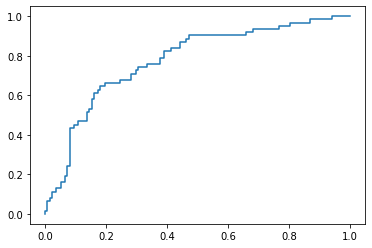

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thr = roc_curve(y_test, ypred_test_prob[:,0], pos_label = 0)
plt.plot(fpr, tpr)

roc_auc_score(y_test, ypred_test_prob[:,1])

In [ ]:
pd.DataFrame({"fpr":fpr, "tpr":tpr, "thr":thr})

,fpr,tpr,thr
0,0.000000,0.000000,1.967859
1,0.000000,0.016129,0.967859
2,0.007246,0.016129,0.957379
3,0.007246,0.064516,0.923449
4,0.014493,0.064516,0.915331
...,...,...,...
66,0.869565,0.967742,0.028516
67,0.869565,0.983871,0.028475
68,0.942029,0.983871,0.020215
69,0.942029,1.000000,0.018070


In [ ]:
coord = np.array([[1,2,2,4,4,5],[1,1,3,1,2,3]])
coord

array([[1, 2, 2, 4, 4, 5],
       [1, 1, 3, 1, 2, 3]])

In [ ]:
mu1 = np.array([5/3,5/3])
mu2 = np.array([13/3,2])

In [ ]:
print(((coord - mu1.reshape(-1,1))**2).sum(axis = 0)) 
print(((coord - mu2.reshape(-1,1))**2).sum(axis = 0)) 

[ 0.88888889  0.55555556  1.88888889  5.88888889  5.55555556 12.88888889]
[12.11111111  6.44444444  6.44444444  1.11111111  0.11111111  1.44444444]
